# Support Vector Machine Practice

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC()

svm.fit(X_train, y_train)

print('The accuracy on the training subsets: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subsets: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subsets: 1.000
The accuracy on the test subsets: 0.629


C:\Users\knataraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Looks like the model is overfitting the data

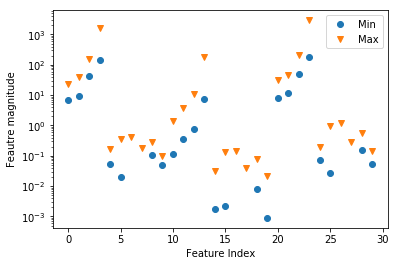

In [4]:
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_test.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feautre magnitude')
plt.yscale('Log')
plt.legend(loc='upper right')

In [6]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)
X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = (X_test - min_train)/range_train

In [8]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

C:\Users\knataraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
print('The accuracy on the training subsets: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subsets: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subsets: 0.948
The accuracy on the test subsets: 0.951


#### The performance looks better when data is scaled!

The performace is improved but the data is underfitting

In [10]:
svm = SVC(C=1000)

In [11]:
svm.fit(X_train_scaled, y_train)
print('The accuracy on the training subsets: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subsets: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subsets: 0.988
The accuracy on the test subsets: 0.972


C:\Users\knataraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


This model is good to go with a balanced output!

# Advantages of SVM

## *  <font color=green>Stronger points</font>
        -  Versatile, can do on a variety of datasets
        -  can do well on high dimensional data
        -  can build complex decision boundaries

## *  <font color=red>Weaker points</font>
        -  doesn't perform well when the data exceeds 100k samples
        -  preprocessing is required
        -  harder to inspect and visualize

### <font color = Pink>Alternatives</font>
    -  Decision trees & Random forest as these require less/no preprocessing of data, easier to understand, inspect & visualize

### <font color = blue> Good Practices </font>
    *  Data scaling
    *  tuning hyper-parameters C and gamma
